<center>
<h1> Constraints with Large Scale Structures </h1>
<h2> (BAO with BOSS) </h2>
</center>

<center>
<img src= "fig0.png" height=800 width=800\> 
</center>

<center>
<h2> Sebastien Fromenteau et al. 2016 </h2>
</center>

# Introduction

What we want:

- Understand statistical tools used for parameter inference.
- Create the code used to find confidence levels for our parameters with CAMB, using data from SDSS III (BOSS).

# Programming and Statistics

In order to understand the $\chi^2$ test used a toy a model. Remembering that the estimator is:

$$
\chi^2 = \sum_{i=1}^n \frac{(y_i^{\text{mod}} - y_i^{\text{data}})^2}{\sigma_i^2}
$$

- We coded it in Python.
- And then we found the best fitting  model to our data.

After that we used the $\Delta \chi^2$ to find the confidence levels of our parameters. 

<img src= "fig1.png" height=800 width=800\> 

# BAO with BOSS

<center>

<img src= "fig2.png" height=400 width=400\> 

Anderson et al. ArXiV: 1312.4877v2

<h3> SDSS III / BOSS </h3>

<h3> DR10 </h3>

<h3> CMASS </h3>

</center>

# Data Fitting

In [86]:
import sys, platform, os
from matplotlib import pyplot as plt
import numpy as np
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

#LaTeX
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#uncomment this if you are running remotely and want to keep in synch with repo changes
#if platform.system()!='Windows':
#    !cd $HOME/git/camb; git pull github master; git log -1
print('Using CAMB installed at '+ os.path.realpath(os.path.join(os.getcwd(),'..')))
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))

import camb
from camb import model, initialpower

Using CAMB installed at /home/favio/Documents/UNAM/SegundoSemestre/Congresos/CosmoStatSchool


In [87]:
import scipy.integrate as integrate
import scipy.special as special
from scipy.interpolate import interp1d

tab_cov_xi0  =np.loadtxt('tab_cov_xi0_DR10.txt')
tab_bins = np.loadtxt('tab_bins_DR10.txt')
cov_mat = np.matrix(tab_cov_xi0)
#print cov_mat.I
cov_inv = cov_mat.I

nbb = len(tab_bins)

tab_err_xi0 = np.zeros(nbb)

In [88]:
nb_bias = 100
tab_bias=np.linspace(1., 3., nb_bias)

#
arrob = np.linspace(0.009,0.050,30)
#

tab_chi2 = np.zeros((len(arrob),nb_bias))
tab_chi2_cov = np.zeros((len(arrob),nb_bias))

In [89]:
for indx in range(len(arrob)):
    pars = camb.CAMBparams()
    pars.set_cosmology(H0=67.5, ombh2=arrob[indx], omch2=0.122)
    pars.set_dark_energy() #re-set defaults
    pars.InitPower.set_params(ns=0.965)
#Not non-linear corrections couples to smaller scales than you want
    pars.set_matter_power(redshifts=[ 0.55], kmax=10.0)

#Linear spectra
#pars.NonLinear = model.NonLinear_none
#Non-Linear spectra
    pars.NonLinear = model.NonLinear_none
    results = camb.get_results(pars)
    kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 5000)
    s8 = np.array(results.get_sigma8())

    xi = np.zeros(nbb)

    for i in range(0,nbb):
        tab_err_xi0[i] = tab_cov_xi0[i,i]


    kstart = 0
    kcut = 10
    kcut_ind = np.argmin( abs(kh - kcut))

    factor = np.power(kh[kstart:kcut_ind],2) * pk[0,kstart:kcut_ind] / (kh[kstart:kcut_ind]*2*np.pi**2)
    for i in range(0, nbb):
            IntegrandXi0 = factor * np.sin(kh[kstart:kcut_ind]*tab_bins[i]) / tab_bins[i]
            xi[i] = np.trapz(IntegrandXi0,kh[kstart:kcut_ind])
    vals_err = np.power(tab_bins,2)*np.sqrt(tab_err_xi0)
    vals_measure = np.power(tab_bins,2)*tab_xi0

    for i in range(0, nb_bias):
        vals_mod = np.power(tab_bins,2)*xi*tab_bias[i]**2
        vals_mod_cov = xi*tab_bias[i]**2
        tab_chi2[indx,i] = np.sum( np.power((vals_mod - vals_measure)/vals_err,2)  )
        tab_chi2_cov[indx,i] = np.dot( vals_mod_cov-tab_xi0 , np.dot( cov_inv , 
                                                                (vals_mod_cov.reshape( nbb,1)-
                                                                 tab_xi0.reshape(nbb,1) ) ) )

In [90]:
t_min = np.unravel_index(tab_chi2_cov.argmin(), tab_chi2_cov.shape)

# Positions of the best fit parameters
print(t_min)

#Best OmBh^2, Best bias
arrob[7],tab_bias[50]

(7, 50)


(0.018896551724137931, 2.0101010101010104)

<IPython.core.display.Javascript object>


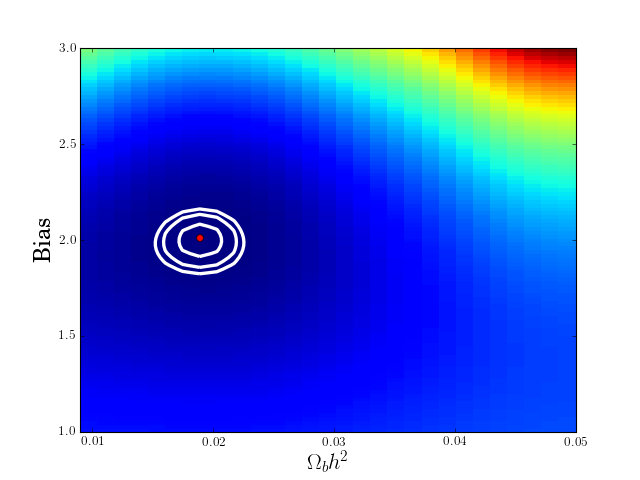

In [91]:
tab_delta_chi2 = tab_chi2_cov - tab_chi2_cov.min()

lev = [2.3,6.17,9.21]

plt.pcolormesh(arrob,tab_bias,np.transpose(tab_chi2_cov))
plt.contour(arrob,tab_bias,np.transpose(tab_delta_chi2),lev,linewidths=3,colors='white')
plt.plot([0.018896551724137931,0.018896551724137931],[2.0101010101010104,2.0101010101010104],"o",color='red')
plt.xlabel(r'$\Omega_b h^2$', fontsize = 20)
plt.ylabel(r'Bias', fontsize = 20)
plt.show()

<center>

<h1> THANKS! </h1>
<img src= "fig4.jpg" height=1000 width=1000\> 
Finished at: 3:02 a.m.
</center>
